In [1]:
import sys
sys.path.append("..")
import GradientMethods.models as models
import GradientMethods.policy_gradient_methods as pgm
import utils
import gymnasium as gym
import torch
import random

# Settings

In [2]:
ENVIRONMENT_ID = "CartPole-v1"
NUM_EPISODES_IN_GIFS = 3
GRAD_CLIP_VALUE = 10
GAMMA = 0.99
NN_HIDDEN_LAYER_SIZES = [8, 4]
RNG_SEED = 7
device = torch.device("cpu")
print("PyTorch device:", device)
torch.manual_seed(RNG_SEED)
random.seed(RNG_SEED)

PyTorch device: cpu


# Random agent

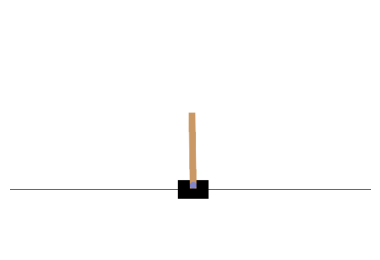

In [3]:
frames = utils.generate_random_agent_frames(ENVIRONMENT_ID, NUM_EPISODES_IN_GIFS, RNG_SEED)
utils.save_frames_as_gif(frames, "./Output/cart_pole_random_agent.gif")

# Trained agent

Average return per episode: 274.21666666666664


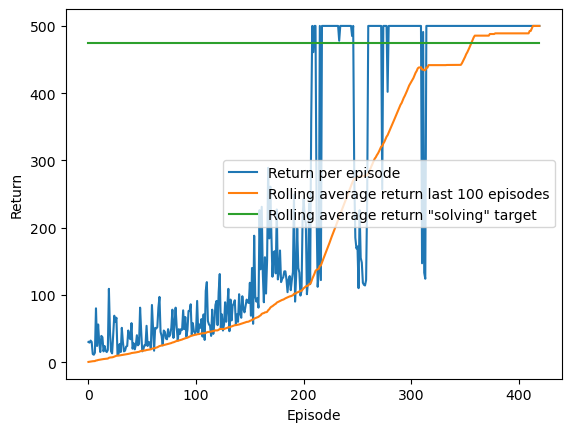

In [4]:
env = gym.make(ENVIRONMENT_ID)
policy_model = models.create_simple_nn(
    env.observation_space.shape[0],
    env.action_space.n,
    NN_HIDDEN_LAYER_SIZES,
    output_activation="softmax"
).to(device)
value_model = models.create_simple_nn(env.observation_space.shape[0], 1, NN_HIDDEN_LAYER_SIZES).to(device)
policy_optimizer = torch.optim.AdamW(policy_model.parameters(), lr=0.01)
value_optimizer = torch.optim.AdamW(value_model.parameters(), lr=0.01)
returns = pgm.train_episodic_reinforce_with_baseline(
    env, policy_model, value_model, policy_optimizer, value_optimizer, device,
    RNG_SEED, 420, GAMMA, GRAD_CLIP_VALUE
)
env.close()
utils.plot_returns(returns, env.spec.reward_threshold)

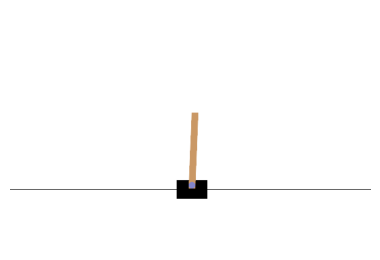

In [5]:
frames = pgm.generate_frames(ENVIRONMENT_ID, NUM_EPISODES_IN_GIFS, policy_model, device)
utils.save_frames_as_gif(frames, "./Output/cart_pole_trained_agent.gif")